In [ ]:
np.sqrt(sigma2_hat)

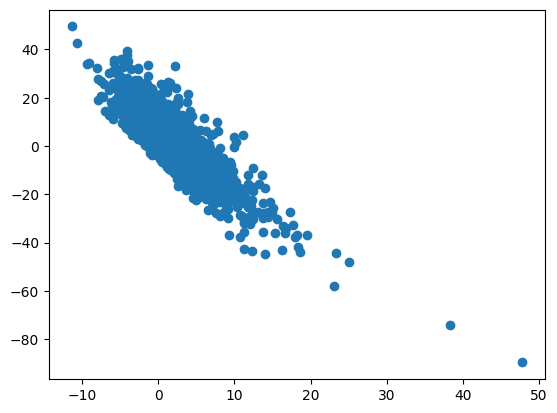

In [2]:
import numpy as np
from data_generation import get_data
import matplotlib.pyplot as plt

rng = np.random.default_rng(seed=0)

y_data, d_data, x_data = get_data(10000, rng)

plt.scatter(d_data,y_data)

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import pickle
from scipy.stats import norm

with open('results_knn.pkl', 'rb') as pickle_file:
    results_dict_ = pickle.load(pickle_file)

In [4]:
print(results_dict_["ate_estimates"].mean(axis=0))
print(results_dict_["se_estimates"].mean(axis=0))
print(results_dict_["mses"].mean(axis=0))

[-2.0716196]
[0.06975281]
[12.87115487  2.35778452]


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from scipy.stats import norm

with open('opt_params_knn.pkl', 'rb') as pickle_file:
    opt_dict_ = pickle.load(pickle_file)

print(opt_dict_)

{'l': {'n_neighbors': 10, 'p': 3}, 'm': {'n_neighbors': 12, 'p': 3}}


In [ ]:
import numpy as np

from data_generation import g, d, get_data

rng = np.random.default_rng(seed=42)

y_data, d_data, x_data = get_data(100000, rng)

def mm_ate(y_data, d_data, x_data):

    # score_a = np.dot(d_data - d(x_data), d_data - d(x_data))
    # score_b = np.dot(d_data - d(x_data), y_data - g(x_data) - (-2.0 * d(x_data)))
    E_Y_given_X = g(x_data) + (-2.0 * d(x_data))
    E_D_given_X = d(x_data)

    # Residuals
    D_res = np.mean(d_data - E_D_given_X)
    Y_res = np.mean(y_data - E_Y_given_X)

    # Oracle estimate
    coef = np.mean(np.multiply(D_res, Y_res)) / np.mean(np.multiply(D_res, D_res))
    # coef = score_b /score_a

    return coef

mm_ate(y_data, d_data, x_data)

In [ ]:
print(y_data[0], d_data[0])

In [ ]:
print(x_data[0])